# Median Household Income

## 1) Introduction
For the final project, our group aimed to find the best Pittsburgh neighborhoods based on standards chosen by ourselves. For me, I chose residence income as a scale. First of all, income is very important for residents' lives. Through the analysis of income and expenditure, we can determine the overall quality of life of residents, and the average household income can also reflect the overall financial situation of the community. This is undoubtedly an important criterion for determining the quality of communities, so I chose to analyze the income of residents in the community. My goal is to figure out the communities in Pittsburgh that have better financial conditions, as a criterion for judging the best community.

## 2) The Metric
I chose the dataset with the median household income as well as its change percentage of every Pittsburgh community. I used the median household income as an estimator to measure the current financial situation of every community. Besides, I measured the economic development situation by analyzing the change percentage of the income. 

Here is my dataset:

In [1]:
import pandas as pd
neib = pd.read_csv('neib_Data.csv')
neib

,SNAP_All_csv_Neighborhood,Median_Home_Value,Change_Real_Value
0,Central Oakland,144350,0.836
1,North Oakland,273000,-0.031
2,West Oakland,61100,0.016
3,Crawford Roberts,94600,0.055
4,Strip District,161800,-0.408
...,...,...,...
80,Fairywood,72800,0.223
81,Chartiers City,76700,-0.042
82,Ridgemont,90500,0.017
83,West End,29800,-0.122


## 3) The Best Neighborhood
I believe that the economic situation of a community should be composed both of the current economic situation and the economic development prospects of that community. Therefore, I conducted the following analysis and sorting of these two data separately.

In [2]:
sort_by_value = neib.sort_values("Median_Home_Value")
print(sort_by_value.head(15))
print("")

sort_by_change = neib.sort_values("Change_Real_Value")
print(sort_by_change.head(15))

   SNAP_All_csv_Neighborhood  Median_Home_Value  Change_Real_Value
16                     Bluff              21200             -0.588
83                  West End              29800             -0.122
72             Homewood West              34500             -0.291
43                   Larimer              34850             -0.316
71            Homewood North              35450             -0.261
11               Beltzhoover              36000             -0.164
55                 Knoxville              39900             -0.125
20                East Hills              40700             -0.369
49               Saint Clair              41100             -0.279
14                 Allentown              42200             -0.028
19  Lincoln-Lemington-Belmar              43767             -0.229
48                 Arlington              44200             -0.100
26             Spring Garden              48000              0.272
70            Homewood South              48400              0

Then, I created two new data frames that only contain the neighborhoods' names after sorting.

In [3]:
sort_neib_value = []
sort_neib_change = []

for i, row in sort_by_value.iterrows():
    sort_neib_value.append(row['SNAP_All_csv_Neighborhood'])

for i, row in sort_by_change.iterrows():
    sort_neib_change.append(row['SNAP_All_csv_Neighborhood'])
    
df_value = pd.DataFrame(sort_neib_value, columns=['Neighborhoods'])
df_change = pd.DataFrame(sort_neib_change, columns=['Neighborhoods'])

print("This is the new data frame sorted by median household income from the lowest to the highest:")
print(df_value)
print("")

print("This is the new data frame sorted by the change percentage of the median household income from the lowest to the highest:")
print(df_change)

This is the new data frame sorted by median household income from the lowest to the highest:
          Neighborhoods
0                 Bluff
1              West End
2         Homewood West
3               Larimer
4        Homewood North
..                  ...
80  Squirrel Hill South
81         Point Breeze
82            Shadyside
83        North Oakland
84  Squirrel Hill North

[85 rows x 1 columns]

This is the new data frame sorted by the change percentage of the median household income from the lowest to the highest:
                Neighborhoods
0                       Bluff
1              Strip District
2              Allegheny West
3                  East Hills
4                     Larimer
..                        ...
80  Central Business District
81            Central Oakland
82                Middle Hill
83       California Kirkbride
84          Bedford Dwellings

[85 rows x 1 columns]


After that, I planned to give each neighborhood a weighted score depending on their rankings. I chose to use the current economic situation as the main evaluation criterion and the economic development prospects of the community as an auxiliary evaluation. Therefore, I set different weights for these two data, 0.7 and 0.3, respectively. In the end, I created a dictionary to store the communities' name and their scores and created another data frame sorted by the scores.

In [4]:
dic = {}
for i, row in df_value.iterrows():
    dic[row['Neighborhoods']] = 0.7 * (i+1)
    
for i, row in df_change.iterrows():
    if row['Neighborhoods'] in dic:
        dic[row['Neighborhoods']] = dic[row['Neighborhoods']] + 0.3 * (i+1)
        
df_total_score = pd.DataFrame({'Neighborhoods': list(dic.keys()), 'Score': list(dic.values())})
sort_by_score = df_total_score.sort_values("Score")

print("This is the new dataframe sorted by neighborhoods' scores from the lowest to the highest:")
print(sort_by_score)
print("")

print("Here are our final top 10 neighborhoods with their scores:")
sort_by_score.tail(10)

This is the new dataframe sorted by neighborhoods' scores from the lowest to the highest:
       Neighborhoods  Score
0              Bluff    1.0
2      Homewood West    3.9
3            Larimer    4.3
1           West End    5.6
4     Homewood North    5.9
..               ...    ...
75  South Side Flats   76.9
78     Highland Park   76.9
74   Central Oakland   77.1
79     Regent Square   78.8
82         Shadyside   80.6

[85 rows x 2 columns]

Here are our final top 10 neighborhoods with their scores:


,Neighborhoods,Score
84,Squirrel Hill North,73.6
71,Central Northside,73.8
80,Squirrel Hill South,74.1
81,Point Breeze,74.5
72,Central Business District,75.4
75,South Side Flats,76.9
78,Highland Park,76.9
74,Central Oakland,77.1
79,Regent Square,78.8
82,Shadyside,80.6


In the final step, I created two histograms to visualize the data:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

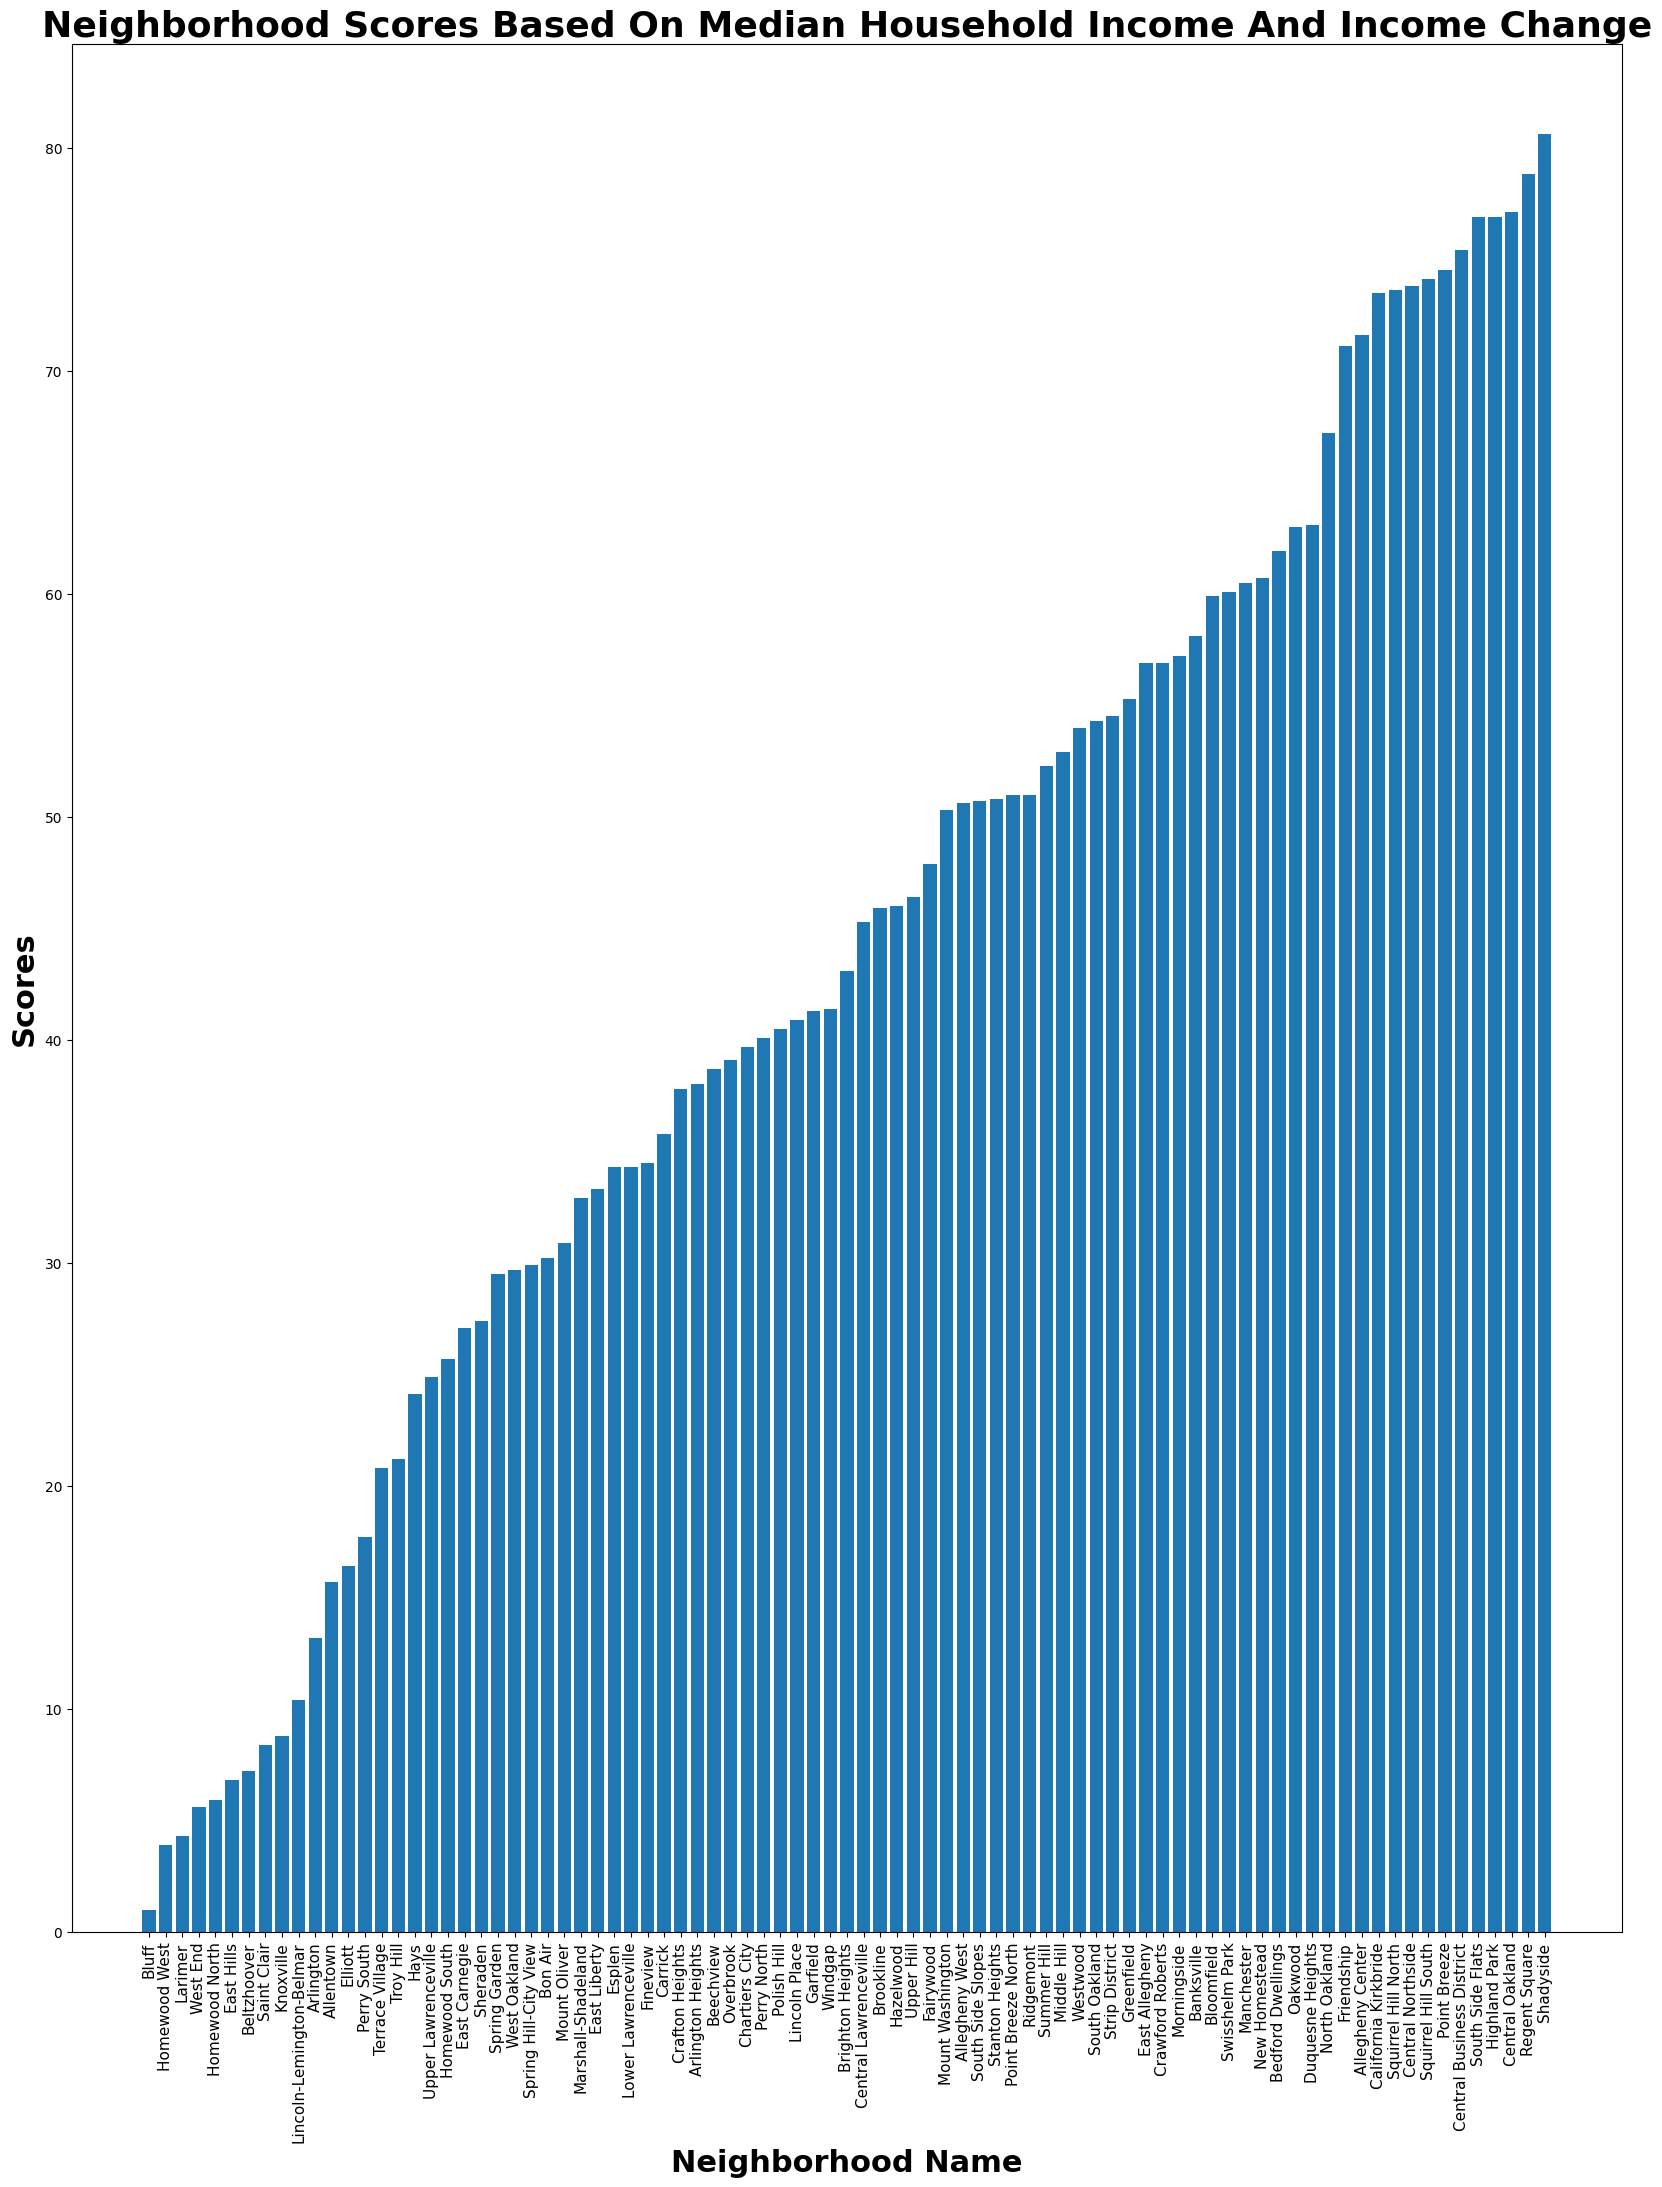

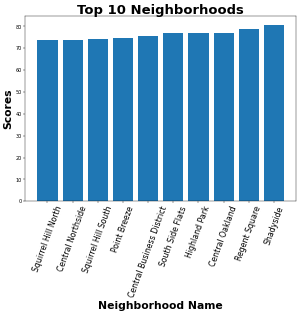

In [5]:
import matplotlib.pyplot as plt

top_10_neighborhoods = sort_by_score.tail(10)

fig, axes = plt.subplots(figsize=(20,25), dpi=100)
plt.bar(sort_by_score.Neighborhoods, height=sort_by_score.Score)
plt.title('Neighborhood Scores Based On Median Household Income And Income Change', fontsize = 26, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neighborhood Name', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 11)

fig, axes = plt.subplots(figsize=(10,7), dpi=35)
plt.bar(top_10_neighborhoods.Neighborhoods, height=top_10_neighborhoods.Score)
plt.title('Top 10 Neighborhoods', fontsize = 27, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neighborhood Name', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=70, fontsize = 16)

## 4) Conclusion
According to my result, the top three neighborhoods are Shadyside, Regent Square, and Central Oakland. The result is very close to my personal inclination but with only one difference. For me, I would prefer Squirrel Hill or Downtown instead of Regent Square since I went to Squirrel Hill and Downtown more often compared with Regent Square.